# Volume I: Data Visualization. Solutions File.

In [2]:
import numpy as np
from scipy.stats import linregress
from matplotlib import rcParams, colors, pyplot as plt
%matplotlib inline

rcParams["figure.figsize"] = (18,9)

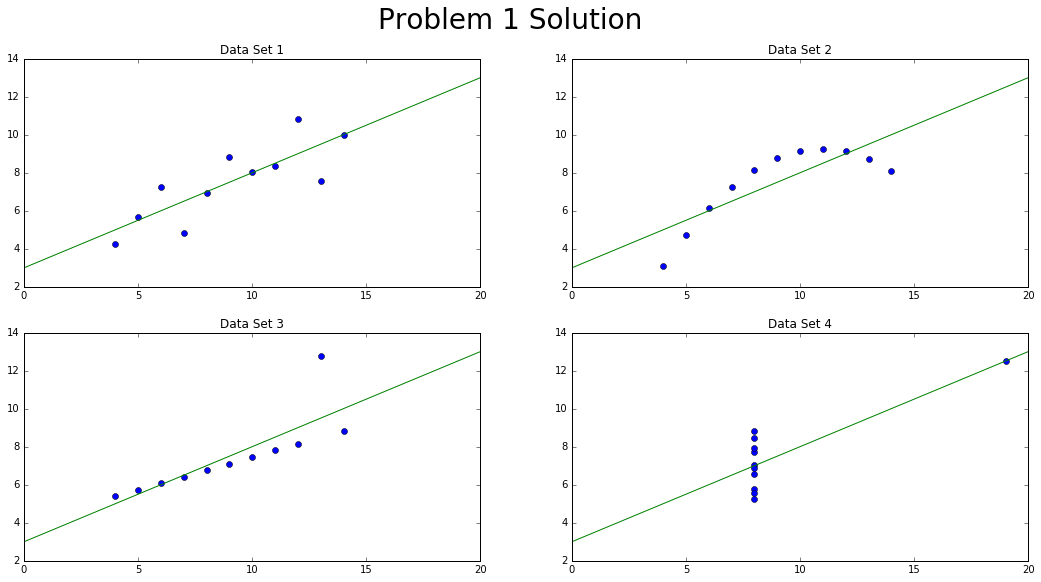

In [4]:
# Problem 1: Anscombe's quartet.

A = np.load("anscombe.npy")
x = np.linspace(0,20,20)
y = .5*x + 3
for i in xrange(4):
    plt.subplot(2,2,i+1)
    plt.plot(A[:,2*i], A[:,2*i+1], 'o')
    plt.plot(x,y)
    plt.title("Data Set {}".format(i+1))
_ = plt.suptitle("Problem 1 Solution", fontsize=28)

The student plots should look almost exactly like the ones shows above, and they should write a sentence or two about each set and how it is unique.
Sample answers might be something like the following:

**Data Set 1**: Randomly scattered around the regression line. The $x$-coordinates appear uniformly distributed.

**Data Set 2**: Parabolic, not linear. The $x$-values are nearly perfectly spaced.

**Data Set 3**: Linear, very close to the regression line. A single vertical outlier skews the regression.

**Data Set 4**: Linear. A single horizontal outlier skews the regression, but the rest of the points all have the same $x$-coordinate.

_**5 Points**_

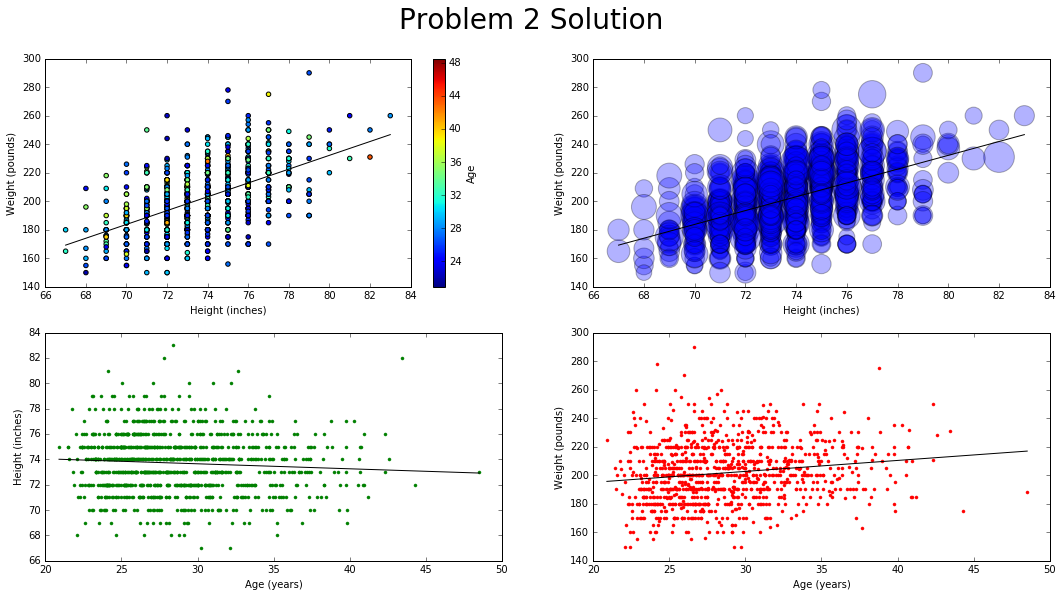

In [5]:
# Problem 2: Visualize the MLB data.
height, weight, age = np.load("MLB.npy").T

def linear_regression_line(x, y):
    slope, intercept = linregress(x,y)[:2]
    domain = np.linspace(x.min(), x.max(), 20)
    plt.plot(domain, domain*slope + intercept, 'k-')

# Height vs. Weight, Age as a color.
plt.subplot(221)
plt.scatter(height, weight, c=age)
cbar = plt.colorbar()
cbar.set_label("Age")
linear_regression_line(height, weight)
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")

# Height vs. Weight, Age as size.
plt.subplot(222)
plt.scatter(height, weight, s=.5*age**2, alpha=.3)
linear_regression_line(height, weight)
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")

# Age vs. Height
plt.subplot(223)
plt.plot(age, height, 'g.')
linear_regression_line(age, height)
plt.xlabel("Age (years)")
plt.ylabel("Height (inches)")

plt.subplot(224)
plt.plot(age, weight, 'r.')
linear_regression_line(age, weight)
plt.xlabel("Age (years)")
plt.ylabel("Weight (pounds)")

_ = plt.suptitle("Problem 2 Solution", fontsize=28)

The students should produce at least 1 plot.
The scatter plot in the top right corner is preferable, as it plots the variables that have the most correlation together.
However, the bottom scatter plots are at least useful for showing that age is not very correlated with height or weight in the MLB.

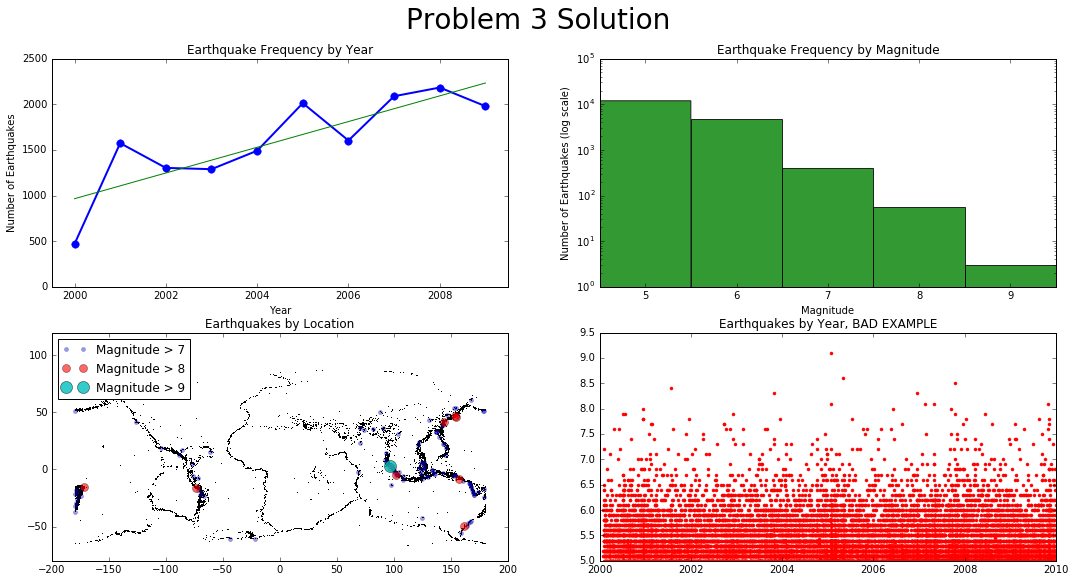

In [6]:
# Problem 3: Visualize the earthquake data.
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T

# Line plot of earthquakes per year.
plt.subplot(221)
xlimits = [1999.5, 2009.5]
counts, bin_edges = np.histogram(years, bins=10, range=xlimits)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts, '.-', lw=2, ms=15)

# Linear regression line.
slope, intercept = linregress(bin_centers, counts)[:2]
plt.plot(bin_centers, bin_centers*slope + intercept, 'g')

plt.xlim(xlimits)
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Frequency by Year")

# Histogram of earthquake magnitudes.
plt.subplot(222)
xlimits = [4.5, 9.5]
plt.hist(magnitudes, range=xlimits, bins=5, log=True, color='g', alpha=.8)
plt.xlim(xlimits)
plt.xlabel("Magnitude")
plt.ylabel("Number of Earthquakes (log scale)")
plt.title("Earthquake Frequency by Magnitude")

# Scatter plot of lattitudes versus longitudes to show where earthquakes happen.
plt.subplot(223)
plt.plot(longitude, latitude, 'k,')
plt.gca().set_aspect("equal")

# Identify bigger earthquakes with colored dots.
index = (8 > magnitudes) * (magnitudes > 7)
plt.plot(longitude[index], latitude[index], 'bo', alpha=.4, ms=4, label="Magnitude > 7")
index = (9 > magnitudes) * (magnitudes > 8)
plt.plot(longitude[index], latitude[index], 'ro', alpha=.6, ms=8, label="Magnitude > 8")
index = magnitudes > 9
plt.plot(longitude[index], latitude[index], 'co', alpha=.8, ms=12, label="Magnitude > 9")
plt.ylim(ymax=120)
plt.legend(loc="upper left")
plt.title("Earthquakes by Location")

# Bad example.
plt.subplot(224)
plt.plot(years, magnitudes, 'r.')
plt.title("Earthquakes by Year, BAD EXAMPLE")

_ = plt.suptitle("Problem 3 Solution", fontsize=28)

The student should produce 2 or 3 plots.
They do not have to be exactly like the ones shown above, but they should address the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

_**10 points**_

In [ ]:
def rosenbrock(x,y):
    return (1.-x)**2 + 100.*(y-x**2)**2

N = 500
x = np.linspace(-2, 2, N)
y = np.linspace(-1, 3, N)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X,Y)

plt.subplot(221)
plt.pcolormesh(X, Y, Z, cmap="viridis")
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(X, Y, Z, cmap="viridis", norm=colors.LogNorm(vmin=1e-6))
plt.colorbar()

plt.subplot(223)
plt.contourf(X, Y, Z, 10, cmap="viridis", norm=colors.LogNorm(vmin=1e-6))
plt.colorbar()

plt.subplot(224)
plt.contour(X, Y, rosenbrock(X,Y), 10, cmap="viridis", norm=colors.LogNorm(vmin=1e-6))
plt.colorbar()
plt.plot([1],[1],'r*', ms=10, alpha=.8)


_ = plt.suptitle("Problem 3 Solution", fontsize=28)

In [ ]:
x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(x, y)
Z = Y**2 - X**3 + X**2

# plt.contourf(X, Y, Z, [-2,-1,0.0001,1,2,3,4,5], cmap="viridis")
plt.contour(X, Y, Z, [-2,-1,0.0001,1,2,3,4,5], colors="white")
plt.pcolormesh(X, Y, Z, cmap="viridis")
plt.colorbar()

plt.gca().set_aspect("equal")

In [ ]:
A = np.load("anscombe.npy")
x, y = A[:,0], A[:,1]
plt.scatter(x, y, s=y**4, c=np.random.random(size=len(x)))

In [ ]:
plt.colorbar?